# Predicting house prices

In [1]:
# modules we'll use
import pandas as pd
import numpy as np

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# read in all our data
houses = pd.read_csv("../DATA/houses.csv")

# set seed for reproducibility
np.random.seed(0)

#Load some house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [2]:
houses

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


#Exploring the data for housing sales 

The house price is correlated with the number of square feet of living space.

In [10]:
x = houses.LotArea
y = houses.SalePrice

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( x, y, test_size=0.20, random_state=0)

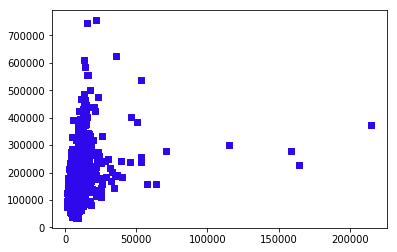

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x, y , color='#2F08EC', marker="s")
#plt.scatter(x, y_ , color='#FF082C')
#plt.plot(houses.LotArea, houses.SalePrice , color='#FF0000')


#Create a simple regression model of sqft_living to price

Split data into training and testing.  
We use seed=0 so that everyone running this notebook gets the same results.  In practice, you may set a random seed (or let GraphLab Create pick a random seed for you).  

##Build the regression model using only sqft_living as a feature

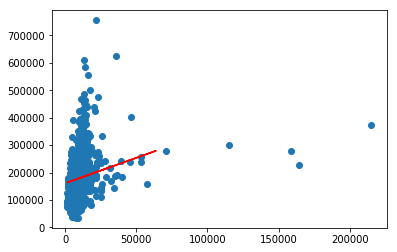

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(X_train[:, np.newaxis], Y_train)

Y_pred = model.predict(X_test[:, np.newaxis])

plt.scatter(X_train, Y_train)
plt.plot(X_test, Y_pred, color='#FF0000');

#Evaluate the simple model

In [24]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
print(model.intercept_)
print(model.coef_)

print('Coefficients: W=%.3f, b=%.3f' % (model.coef_[0],model.intercept_))

161179.01546459418
[1.85368175]
Coefficients: W=1.854, b=161179.015


RMSE of about \$255,170!

#Let's show what our predictions look like

Matplotlib is a Python plotting library that is also useful for plotting.  You can install it with:

'pip install matplotlib'

In [26]:
def predict(x,W,b):
    p = list()
    for i in x:
        y = W*i + b
        p.append(y)
    return p

In [27]:
y_ = predict(X_test,model.coef_,model.intercept_)

Above:  blue dots are original data, green line is the prediction from the simple regression.

Below: we can view the learned regression coefficients. 

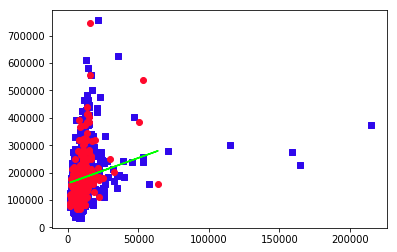

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X_train, Y_train , color='#2F08EC', marker="s")
plt.scatter(X_test, Y_test , color='#FF082C')
plt.plot(X_test, y_ , color='#00FF00')

#Explore other features in the data

To build a more elaborate model, we will explore using more features.

In [ ]:
#Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,
#Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,
#HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,
#Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,
#BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,
#Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,
#BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,
#FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,
#WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,
#MoSold,YrSold,SaleType,SaleCondition,SalePrice

x2 = houses[LotFrontage,LotArea,OverallQual,OverallCond]


X2_train, X2_test, Y2_train, Y2_test = train_test_split( houses, y, test_size=0.20, random_state=0)

In [33]:
model = LinearRegression(fit_intercept=True)

model.fit(X2_train, Y2_train)


yfit = model.predict(X2_test[:, np.newaxis])

#plt.scatter(X2_train, Y2_train)
#plt.plot(X2_test, yfit, color='#FF0000');

ValueError: could not convert string to float: 'Normal'

In [ ]:
sales.show(view='BoxWhisker Plot', x='zipcode', y='price')

Pull the bar at the bottom to view more of the data.  

98039 is the most expensive zip code.

#Build a regression model with more features

In [ ]:
my_features_model = graphlab.linear_regression.create(train_data,target='price',features=my_features,validation_set=None)

In [ ]:
print my_features

##Comparing the results of the simple model with adding more features

In [ ]:
print sqft_model.evaluate(test_data)
print my_features_model.evaluate(test_data)

The RMSE goes down from \$255,170 to \$179,508 with more features.

#Apply learned models to predict prices of 3 houses

The first house we will use is considered an "average" house in Seattle. 

In [ ]:
house1 = sales[sales['id']=='5309101200']

In [ ]:
house1

<img src="http://info.kingcounty.gov/Assessor/eRealProperty/MediaHandler.aspx?Media=2916871">

In [ ]:
print house1['price']

In [ ]:
print sqft_model.predict(house1)

In [ ]:
print my_features_model.predict(house1)

In this case, the model with more features provides a worse prediction than the simpler model with only 1 feature.  However, on average, the model with more features is better.

##Prediction for a second, fancier house

We will now examine the predictions for a fancier house.

In [ ]:
house2 = sales[sales['id']=='1925069082']

In [ ]:
house2

<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [ ]:
print sqft_model.predict(house2)

In [ ]:
print my_features_model.predict(house2)

In this case, the model with more features provides a better prediction.  This behavior is expected here, because this house is more differentiated by features that go beyond its square feet of living space, especially the fact that it's a waterfront house. 

##Last house, super fancy

Our last house is a very large one owned by a famous Seattleite.

In [ ]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Bill_gates%27_house.jpg/2560px-Bill_gates%27_house.jpg">

In [ ]:
print my_features_model.predict(graphlab.SFrame(bill_gates))

The model predicts a price of over $13M for this house! But we expect the house to cost much more.  (There are very few samples in the dataset of houses that are this fancy, so we don't expect the model to capture a perfect prediction here.)